<a href="https://colab.research.google.com/github/ssunsonic/ML_Project/blob/main/Image_Preprocessing_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Preprocessing and Initial CNN Rough Draft

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Moved all test images into train folder since we can just split them into train and test anyway

In [70]:
dataset = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/')

Found 2876 files belonging to 2 classes.


In [71]:
len(dataset)

90

In [72]:
import tensorflow_datasets as tfds
batch_size = 64

In [74]:
# dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['chihuahua', 'muffin']


## Image Resizing

In [75]:
# size of images we want to resize to
size = (640,640)

In [76]:
# resize all images
dataset = dataset.map(lambda image, label: (tf.image.resize(image, size), label))

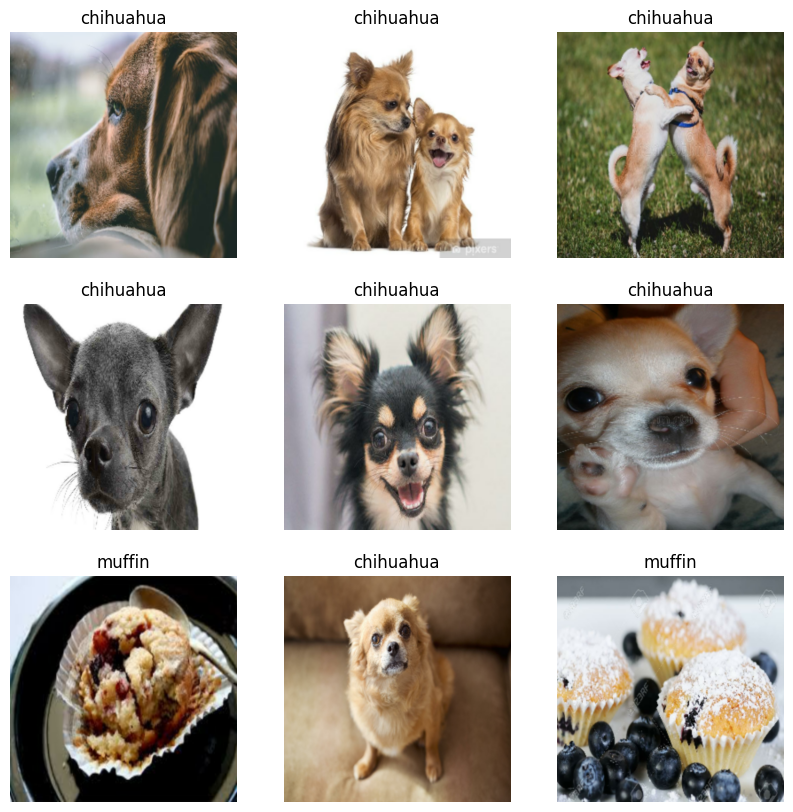

In [79]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  # display 9 resized images
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Greyscaling

In [80]:
dataset = dataset.map(lambda image, label: (tf.image.rgb_to_grayscale(image), label))

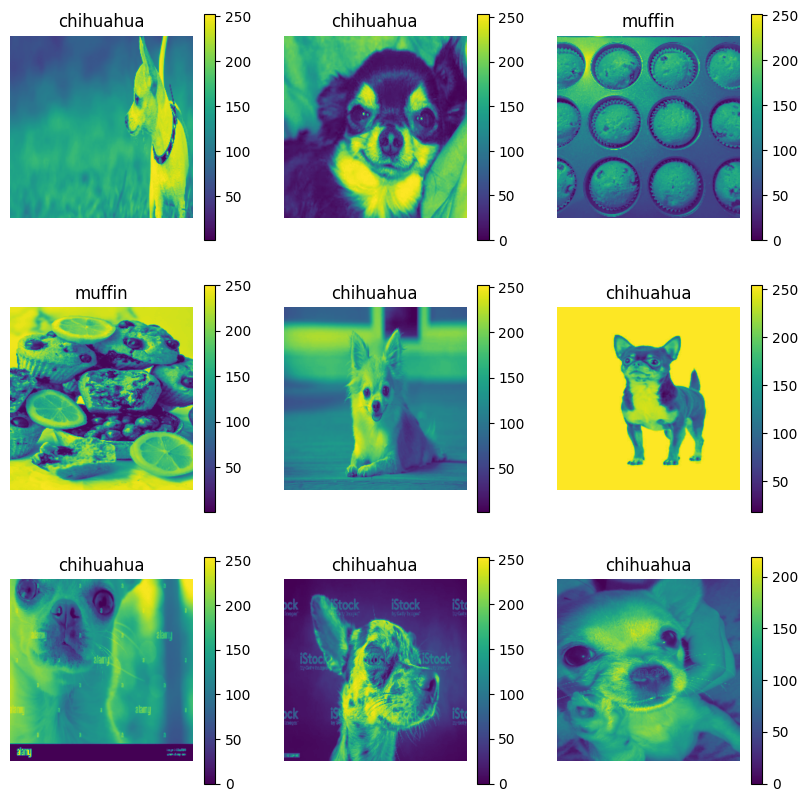

In [81]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.colorbar()

## Modeling

### Split into Train/Validation

In [84]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/',
            validation_split=0.2, subset = 'training', seed = 1)
ds_val = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/ECS171/ML_Project/images/',
            validation_split=0.2, subset = 'validation', seed = 1)

Found 4320 files belonging to 2 classes.
Using 3456 files for training.
Found 4320 files belonging to 2 classes.
Using 864 files for validation.


108

### CNN Keras Model


In [91]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
  layers.Rescaling(1./255, input_shape=(640,640,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [ ]:
# compile model
model.compile(optimizer = '', loss = , metrics = ['accuracy'])